In [2]:
import pyautogui as pg
import time
import keyboard
from tqdm import tqdm
import tracker
class mouse:
    def __init__(self,ch_loc = False):
        self.ch_loc = ch_loc
        
        self.memX, self.memY = 0,0
        
        # self.viewlocX, self.viewlocY = 2023, 932
        # self.cursor02X, self.cursor02Y = 1933, 740
        # self.cursor03X, self.cursor03Y = 1935, 740
        # self.cursor05X, self.cursor05Y = 1938, 740
        # self.cursor10X, self.cursor10Y = 1948, 740
        # self.cursor20X, self.cursor20Y = 1969, 740
        # self.cursor50X, self.cursor50Y = 2029, 740
        # self.LU_X,self.LU_Y = 2274, 150
        # self.RB_X,self.RB_Y = 3286, 1000
        
        self.viewlocX, self.viewlocY = 103, 927
        self.cursor02X, self.cursor02Y = 13, 742
        self.cursor03X, self.cursor03Y = 15, 742
        self.cursor05X, self.cursor05Y = 18, 739
        self.cursor10X, self.cursor10Y = 29, 739
        self.cursor20X, self.cursor20Y = 48, 739
        self.cursor50X, self.cursor50Y = 109, 744
        self.LU_X, self.LU_Y = 307, 124
        self.RB_X, self.RB_Y = 1372, 981    
        self.dullclick = (1643,552)   
        
        self.liner = tracker.liner((self.LU_X,self.LU_Y),(self.RB_X,self.RB_Y))
        self.liner.get_map()
        
    def memloc(self):
        self.memX,self.memY = pg.position()
        
    def save_key(self, key):
        while True:
            if keyboard.is_pressed(key):
                self.memloc()
                self.locX = self.memX
                self.locY = self.memY
                return self.locX,self.locY
        
        # keyboard.wait(key)    
        # self.memloc()
        # self.locX = self.memX
        # self.locY = self.memY
        # return self.locX,self.locY            
    
    def click_key(self, key, X,Y):
        if keyboard.is_pressed(key):
            self.memloc()
            pg.click(X,Y)
            pg.moveTo(self.memX,self.memY)
            time.sleep(0.2)
            
    def press_function(self,key,func):
        # keyboard.wait(key)
        # return func()
        
        while True:
            if keyboard.is_pressed('f'):
                return None
            if keyboard.is_pressed(key):
                return func()

    def erase_all(self):
        if keyboard.is_pressed('0'):
            while True:
                t = keyboard.read_key()
                if t:
                    if t == 'e':
                        break
                    elif t == '0':
                        pass
                    else:
                        return False
                
            self.memloc()
            
            pg.click(self.cursor50X, self.cursor50Y)
            pg.keyDown('CTRL')
            pg.moveTo(self.LU_X,self.LU_Y)
            ms_y = self.LU_Y
            pg.mouseDown()
            for i in range(3):
                pg.moveTo(self.RB_X,ms_y,0.6)
                ms_y += int((self.RB_Y-self.LU_Y)/5)
                pg.moveTo(self.RB_X,ms_y,0.1)
                pg.moveTo(self.LU_X,ms_y,0.6)
                ms_y += int((self.RB_Y-self.LU_Y)/5)
                pg.moveTo(self.LU_X,ms_y,0.1)
            pg.mouseUp()
            
            pg.keyUp('CTRL')
            pg.moveTo(self.memX,self.memY)
    
    def set_map(self):
        self.liner.get_map()
    
    def get_loc(self):
        return pg.position()
    
    def draw_line(self,st,end):
        track = tracker.tracker(st,end,map = self.liner.map)
        track.mouse_follow()
        return track.loclist[-1]
    
    def click_all(self):
        if keyboard.is_pressed('g'):
            self.liner.mouse_click_all()

    # def draw_line(self,lst):
    #     track = tracker.tracker((0,0),(0,0),map = self.liner.map)
    #     track.mouse_follow(lst)
    #     return track.loclist[-1]

    # def run_line_relay(self):
    #     if keyboard.is_pressed('r'):
    #         self.set_map()
        
    #     if keyboard.is_pressed('s'):
    #         lst = []
    #         while True:
    #             dot_s = self.press_function('s',self.get_loc)
    #             print('s')
    #             lst.append(dot_s)
    #             time.sleep(0.1)
    #             if keyboard.is_pressed('d'):
    #                 break
    #         dot_e = self.press_function('d',self.get_loc)
    #         print('d')
    #         lst.append(dot_e)
            
    #         n_end = self.draw_line(lst)
            
    #         pg.moveTo(n_end)       
            
    def run_line(self):
        if keyboard.is_pressed('r'):
            self.set_map()
            
        # if keyboard.is_pressed('s'):
        #     st = self.press_function('s',self.get_loc)
        #     end = self.press_function('d',self.get_loc)
            
        #     n_end = self.draw_line(st,end)
        #     pg.moveTo(n_end)

        if keyboard.is_pressed('s'):
            lst = []
            while True:
                # if keyboard.is_pressed('f'):
                #     break
                dot1 = self.press_function('s',self.get_loc)
                if dot1== None:
                    break

                dot2 = self.press_function('d',self.get_loc)
                if dot2== None:
                    break
                lst.append((dot1,dot2))
            
            for dots in lst:
                st,end = dots
                n_end = self.draw_line(st,end)   
                time.sleep(0.1)        
                     
            # for n in range(len(lst)-1):
            #     st = lst[n]
            #     end = lst[n+1]
            #     n_end = self.draw_line(st,end)   
            #     time.sleep(0.1)        
            
            pg.moveTo(self.dullclick)
            time.sleep(0.5)
            pg.moveTo(n_end)
            
    # def run_line_relay(self):
    #     if keyboard.is_pressed('r'):
    #         self.set_map()
        
    #     if keyboard.is_pressed('s'):
    #         lst = []
    #         while not keyboard.is_pressed('d'):
    #             dot_s = self.press_function('s',self.get_loc)
    #             lst.append(dot_s)
    #             time.sleep(0.05)
    #         dot_e = self.press_function('d',self.get_loc)
    #         lst.append(dot_e)
            
    #         for n in range(len(lst)-1):
    #             st = lst[n]
    #             end = lst[n+1]
    #             n_end = self.draw_line(st,end)
            
    #         pg.moveTo(n_end)            
            
            
    def init_change(self):
        print('Select label loc')
        self.viewlocX, self.viewlocY = self.save_key('s')
        print(f'loc :{self.viewlocX}, {self.viewlocY}')
        time.sleep(0.5)

        print('Select cursor02 loc')
        self.cursor02X, self.cursor02Y = self.save_key('s')
        print(f'loc :{self.cursor02X}, {self.cursor02Y}')
        time.sleep(0.5)
        
        print('Select cursor03 loc')
        self.cursor03X, self.cursor03Y = self.save_key('s')
        print(f'loc :{self.cursor03X}, {self.cursor03Y}')
        time.sleep(0.5)
        
        print('Select cursor05 loc')
        self.cursor05X, self.cursor05Y = self.save_key('s')
        print(f'loc :{self.cursor05X}, {self.cursor05Y}')
        time.sleep(0.5)        
        
        print('Select cursor10 loc')
        self.cursor10X, self.cursor10Y = self.save_key('s')
        print(f'loc :{self.cursor10X}, {self.cursor10Y}')
        time.sleep(0.5)
        
        print('Select cursor20 loc')
        self.cursor20X, self.cursor20Y = self.save_key('s')
        print(f'loc :{self.cursor20X}, {self.cursor20Y}')
        time.sleep(0.5)
        
        print('Select cursor50 loc')
        self.cursor50X, self.cursor50Y = self.save_key('s')
        print(f'loc :{self.cursor50X}, {self.cursor50Y}')
        time.sleep(0.5)
        
        print('Select upperleft loc')
        self.LU_X,self.LU_Y = self.save_key('s')
        print(f'loc :{self.LU_X}, {self.LU_Y}')
        time.sleep(0.5)
        
        print('Select bottomright loc')
        self.RB_X,self.RB_Y = self.save_key('s')
        print(f'loc :{self.RB_X}, {self.RB_Y}')
        time.sleep(0.5)
        
        print('Done!\n')
        
        print(f'self.viewlocX, self.viewlocY = {self.viewlocX}, {self.viewlocY}')
        print(f'self.cursor02X, self.cursor02Y = {self.cursor02X}, {self.cursor02Y}')
        print(f'self.cursor03X, self.cursor03Y = {self.cursor03X}, {self.cursor03Y}')
        print(f'self.cursor05X, self.cursor05Y = {self.cursor05X}, {self.cursor05Y}')
        print(f'self.cursor10X, self.cursor10Y = {self.cursor10X}, {self.cursor10Y}')
        print(f'self.cursor20X, self.cursor20Y = {self.cursor20X}, {self.cursor20Y}')
        print(f'self.cursor50X, self.cursor50Y = {self.cursor50X}, {self.cursor50Y}')
        print(f'self.LU_X, self.LU_Y = {self.LU_X}, {self.LU_Y}')
        print(f'self.RB_X, self.RB_Y = {self.RB_X}, {self.RB_Y}')
        
        
    def run(self, key0 = '`',key1 = '1', key2 = '2', key3 = '3', key4 = '4', keyV = 'C'):
        while True:
            if self.ch_loc == True:
                self.init_change()
                self.ch_loc = False
            # self.save_key('m')
            
            self.click_key(key0,self.cursor02X, self.cursor02Y)
            self.click_key(key1,self.cursor03X, self.cursor03Y)
            self.click_key(key2,self.cursor05X, self.cursor05Y)
            self.click_key(key3,self.cursor10X, self.cursor10Y)
            self.click_key(key4,self.cursor20X, self.cursor20Y)
            self.click_key(keyV,self.viewlocX, self.viewlocY)
            self.erase_all()
            self.run_line()
            #self.click_all()  #deprecated: The running time is not effective cuz this function clicks too much
            # self.run_line_relay()
            if keyboard.is_pressed('F3'):
                break        


In [3]:
# t = mouse(True)
t = mouse()
t.run()

finished_loading


In [7]:
t.run()

FailSafeException: PyAutoGUI fail-safe triggered from mouse moving to a corner of the screen. To disable this fail-safe, set pyautogui.FAILSAFE to False. DISABLING FAIL-SAFE IS NOT RECOMMENDED.

In [4]:
from PIL import Image as im

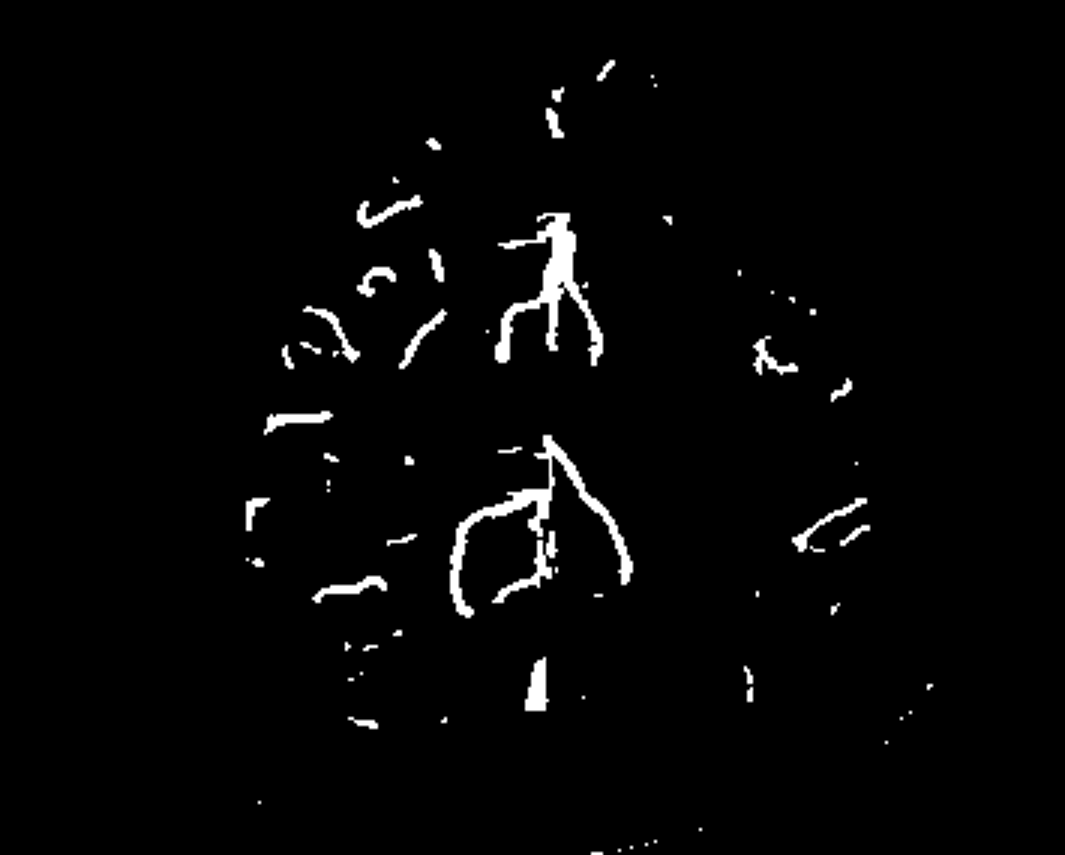

In [5]:
im.fromarray(t.liner.map_small)

In [6]:
# while True:
#     try:
#         t.run()
#     except Exception as e:
#         if e == KeyboardInterrupt:
#             break
#         else:
#             print('error', e)
#             pass
#     if keyboard.is_pressed('F3'):
#         break